# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.127899e+01     6.590252e+00
 * time: 0.004951953887939453
     1     2.792059e+01     5.487202e+00
 * time: 0.020786046981811523
     2     1.966818e+01     4.686125e+00
 * time: 0.10128593444824219
     3     1.358505e+01     3.954102e+00
 * time: 0.1199800968170166
     4     1.060646e+01     1.335772e+00
 * time: 0.1386089324951172
     5     9.797045e+00     1.893624e+00
 * time: 0.15244412422180176
     6     9.329941e+00     1.238184e+00
 * time: 0.16631007194519043
     7     8.917592e+00     1.006700e+00
 * time: 0.1802229881286621
     8     8.539488e+00     1.040988e+00
 * time: 0.19391512870788574
     9     8.309765e+00     8.221763e-01
 * time: 0.20794105529785156
    10     8.276749e+00     1.334649e+00
 * time: 0.21849608421325684
    11     8.185421e+00     8.285322e-01
 * time: 0.23376893997192383
    12     8.148251e+00     1.165950e+00
 * time: 0.24483704566955566
    13     8.104886e+00     6.141354e-01
 * time: 

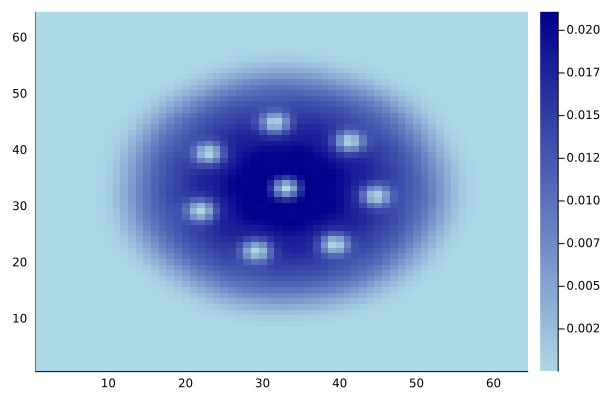

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)